In [1]:
from estnltk import Text

#from estnltk.taggers.raw_text_tagging.date_tagger.date_tagger import DateTagger
#from estnltk.taggers import DateTagger
from pandas import read_csv
from estnltk.taggers import RegexTagger

from estnltk.spans import Span, SpanList
from estnltk.layer import Layer
from estnltk.finite_grammar.trees import print_nodes

In [2]:
with open("examples_.txt", "r") as fin:
    lines = fin.readlines()
lines = [line.strip() for line in lines]    

In [3]:
lines

['PSA 03042012 - 0,83ng/ml perearsti poolt .',
 'PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va',
 'PSA 20105,99 ja 26.01.2012 uuesti .',
 'PSA 2011 oli 0 , 4 nG7ml .',
 'PSA 201222,25ng/ml',
 'PSA 2 aastajooksuldünaamikata , eriuuring',
 ':psa 16,81! ! ! ! ! ,',
 'Happe-aluse tasakaal 6.0 ( 5.0 .. 8.0 )',
 'loli 25 mgx1 ja Monoprili 10 mg Kolesterool 2011a',
 'Kolesterool 1k aastas .',
 'Kõrgenenud kolesterool 2a ( mõõdetud ). Ei pea dieetist kinni',
 'Kontr Verekol 08.12a Per-le juurde .',
 's vas munajuha kasvaja op , günekol 3a tagssi .',
 '08.11.2010 PSA 13.12.2011 7,2ng/ml PSADT on väike .',
 'Rütmihäire tsüklipikkus 330 msek',
 'Loote pikkus : \xa0 3 mm - vastab\xa0 5 nädalat 6 päeva.',
 'Põhjendus: PALAT 10 # ALAT maksanäitaja',
 'ärme vähk 2007 aastast cT3N0M0PSA 59ng/ml .',
 'PSA 8,5( püsib aastaid selles väärtus',
 'S , P-PSA 4.130( <4.100 µg/L )',
 'PSA 5,2.',
 'Kolesterool oli 7,9 mmol/l 0',
 'kolesterool 6.4.',
 'Kolesterool 5,2 mmol/l - esialgu dieet .',
 'SK 3900 g , S

In [4]:
vocabulary = 'regexes.csv'

In [5]:
vocabulary = read_csv(vocabulary, na_filter=False, index_col=False)

In [6]:
test_regex_tagger = RegexTagger(vocabulary=vocabulary[:27],
                                        attributes=['regex_type', 'value', 'grammar_symbol'],
                                        conflict_resolving_strategy='MAX',
                                        overlapped=False,
                                        layer_name='type')

In [7]:
spaces = vocabulary[27:]

In [8]:
spaces

,_regex_pattern_,_group_,_priority_,normalized,regex_type,value,grammar_symbol
27,[-=.>< ]*,0,1,,space,space,SPACE
28,\.?\s*-?\s*,0,1,,space,space,SPACE
29,[-=.>< ]*(on|oli)\s*,0,1,,space,space,SPACE
30,\s*-?:?\s*\<?,0,1,,space,space,SPACE
31,\s*,0,1,,space,space,SPACE


In [9]:
space_tagger = RegexTagger(vocabulary = spaces,
                        attributes = ['normalized'],
                        conflict_resolving_strategy='MAX',
                        overlapped=False,
                        layer_name='space'
                         )

In [10]:
from estnltk.taggers.gaps_tagging.gaps_tagger import GapsTagger
gaps_tagger = GapsTagger(layer_name='random_text_layer',
                         input_layers=['space', 'type'],
                         attributes=['no_idea', 'grammar_symbol'],
                         decorator=lambda t: {'no_idea':'text', 'grammar_symbol':'RANDOM_TEXT'})

In [11]:
lines

['PSA 03042012 - 0,83ng/ml perearsti poolt .',
 'PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va',
 'PSA 20105,99 ja 26.01.2012 uuesti .',
 'PSA 2011 oli 0 , 4 nG7ml .',
 'PSA 201222,25ng/ml',
 'PSA 2 aastajooksuldünaamikata , eriuuring',
 ':psa 16,81! ! ! ! ! ,',
 'Happe-aluse tasakaal 6.0 ( 5.0 .. 8.0 )',
 'loli 25 mgx1 ja Monoprili 10 mg Kolesterool 2011a',
 'Kolesterool 1k aastas .',
 'Kõrgenenud kolesterool 2a ( mõõdetud ). Ei pea dieetist kinni',
 'Kontr Verekol 08.12a Per-le juurde .',
 's vas munajuha kasvaja op , günekol 3a tagssi .',
 '08.11.2010 PSA 13.12.2011 7,2ng/ml PSADT on väike .',
 'Rütmihäire tsüklipikkus 330 msek',
 'Loote pikkus : \xa0 3 mm - vastab\xa0 5 nädalat 6 päeva.',
 'Põhjendus: PALAT 10 # ALAT maksanäitaja',
 'ärme vähk 2007 aastast cT3N0M0PSA 59ng/ml .',
 'PSA 8,5( püsib aastaid selles väärtus',
 'S , P-PSA 4.130( <4.100 µg/L )',
 'PSA 5,2.',
 'Kolesterool oli 7,9 mmol/l 0',
 'kolesterool 6.4.',
 'Kolesterool 5,2 mmol/l - esialgu dieet .',
 'SK 3900 g , S

In [12]:
j = Text(lines[0])

In [13]:
test_regex_tagger.tag(j)

In [14]:
j.regex_type

['measurement_object', 'date4', 'number1', 'unit']

In [15]:
j.type

layer name,attributes,parent,enveloping,ambiguous,span count
type,"regex_type, value, grammar_symbol",None,None,False,4
text,start,end,regex_type,value,grammar_symbol
PSA,0,3,measurement_object,psa,MO
03042012,4,12,date4,date,DATE
"0,83",15,19,number1,whatever,NUMBER
ng/ml,19,24,unit,psa_unit,UNIT


In [16]:
tagged_lines = []
lines_to_texts = {}
for line in lines:
    print(line)
    text = Text(line)
    test_regex_tagger.tag(text)
    #datetagger.tag(text)
    space_tagger.tag(text)
    gaps_tagger.tag(text)
    #t = tag_random_text(text)
    #t = change_date_layer(text)
    tagged_lines.append(text)
    lines_to_texts[line] = text

PSA 03042012 - 0,83ng/ml perearsti poolt .
PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va
PSA 20105,99 ja 26.01.2012 uuesti .
PSA 2011 oli 0 , 4 nG7ml .
PSA 201222,25ng/ml
PSA 2 aastajooksuldünaamikata , eriuuring
:psa 16,81! ! ! ! ! ,
Happe-aluse tasakaal 6.0 ( 5.0 .. 8.0 )
loli 25 mgx1 ja Monoprili 10 mg Kolesterool 2011a
Kolesterool 1k aastas .
Kõrgenenud kolesterool 2a ( mõõdetud ). Ei pea dieetist kinni
Kontr Verekol 08.12a Per-le juurde .
s vas munajuha kasvaja op , günekol 3a tagssi .
08.11.2010 PSA 13.12.2011 7,2ng/ml PSADT on väike .
Rütmihäire tsüklipikkus 330 msek
Loote pikkus :   3 mm - vastab  5 nädalat 6 päeva.
Põhjendus: PALAT 10 # ALAT maksanäitaja
ärme vähk 2007 aastast cT3N0M0PSA 59ng/ml .
PSA 8,5( püsib aastaid selles väärtus
S , P-PSA 4.130( <4.100 µg/L )
PSA 5,2.
Kolesterool oli 7,9 mmol/l 0
kolesterool 6.4.
Kolesterool 5,2 mmol/l - esialgu dieet .
SK 3900 g , SP 51 cm .
Lapse kaal 5,4 kg/82 mg/0,82 ml i/m .
Kehakaal 80,2 kg , KMI 25,9
S , P-NT-proBNP 668 ( <125 p

In [17]:
for line in tagged_lines:
    print(line.text)
    #print(line.dates2)
    print(line.regex_type)
    print(line.random_text_layer)
    print('--------------')

PSA 03042012 - 0,83ng/ml perearsti poolt .
['measurement_object', 'date4', 'number1', 'unit']
SL[Span(perearsti, {'no_idea': 'text', 'grammar_symbol': 'RANDOM_TEXT'}),
Span(poolt, {'no_idea': 'text', 'grammar_symbol': 'RANDOM_TEXT'})]
--------------
PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va
['measurement_object', 'date9', 'unit', 'measurement_object', 'date9', 'number1', 'unit', 'unit']
SL[Span(3, {'no_idea': 'text', 'grammar_symbol': 'RANDOM_TEXT'}),
Span(,, {'no_idea': 'text', 'grammar_symbol': 'RANDOM_TEXT'}),
Span(1,, {'no_idea': 'text', 'grammar_symbol': 'RANDOM_TEXT'}),
Span(B, {'no_idea': 'text', 'grammar_symbol': 'RANDOM_TEXT'}),
Span(va, {'no_idea': 'text', 'grammar_symbol': 'RANDOM_TEXT'})]
--------------
PSA 20105,99 ja 26.01.2012 uuesti .
['measurement_object', 'date4', 'number2', 'unit', 'date4', 'date9']
SL[Span(,, {'no_idea': 'text', 'grammar_symbol': 'RANDOM_TEXT'}),
Span(j, {'no_idea': 'text', 'grammar_symbol': 'RANDOM_TEXT'}),
Span(uuesti, {'no_idea': 'text', 'g

# GRAMMAR

(MO = measurement_object)<br>
QNUMBER = NUMBER_UNIT<br>
QNUMBER = NUMBER<br>
MEASUREMENT = MO_DATE_QNUMBER<br>
MEASUREMENT = MO_QNUMBER<br>
TRASH = RUBBISH_NUMBER<br>
TRASH = RUBBISH_MO_NUMBER<br>
TRASH = RUBBISH<br>
TRASH = MO_DATE

In [18]:
from estnltk.finite_grammar.trees import Rule, Grammar


def decorator(nodes):
    return {}


def checker(nodes):
    return True

##def date_decorator(nodes):
#    date = nodes
#    return {'regex_type': date.regex_type}

def qnumber_decorator(nodes):
    #if len(nodes) == 2:
    number, unit = nodes
    unit_type = unit.value
    return {'value': float(number.text.replace(',', '.').replace(' ', '')),
            'unit': unit.text,
            'unit_type': unit_type,
            'mtype': 'continuous'}


def measurement_decorator(nodes):
    return {'date': nodes[1].value}


def measurement_checker(nodes):
    #if len(nodes) == 2:
    mo, qnumber = nodes[0], nodes[1]
    #units = {'psa':'psa_unit',
    #         'kolesterool':'chol_unit',
    ##         'pulss':'pulss_unit',
    #         'pikkus':'pikkus_unit',
    #         'kaal':'kaal_unit',
    #         'alat':'alat_unit'
    #        }
    #elif len(nodes) == 3:
    #    mo, qnumber = nodes[0], nodes[2]
    #    units = {'psa':'xx_unit',
                 #'kolesterool':'chol_unit',
                 #'pulss':'pulss_unit',
                 #'pikkus':'pikkus_unit',
                 #'kaal':'kaal_unit',
                #'alat':'alat_unit'
                #}
    if hasattr(qnumber, 'unit_type'):
        return True
        #return units[mo.value] == qnumber.unit_type
    return False

rules = []      
rules.append(Rule('QNUMBER', 'NUMBER UNIT', 0, qnumber_decorator, checker))
rules.append(Rule('QNUMBER', 'NUMBER', 1, decorator, checker))
rules.append(Rule('MEASUREMENT', 'MO DATE QNUMBER', 0, measurement_decorator, measurement_checker))
rules.append(Rule('MEASUREMENT', 'MO QNUMBER', 0, decorator, measurement_checker))
rules.append(Rule('TRASH', 'RUBBISH NUMBER', 0, decorator, checker))
rules.append(Rule('TRASH', 'RUBBISH MO NUMBER', 0, decorator, checker))
rules.append(Rule('TRASH', 'RUBBISH', 0, decorator, checker))
rules.append(Rule('TRASH', 'MO DATE', 0, decorator, checker))

grammar = Grammar(start_symbols=['MEASUREMENT', 'TRASH'], rules=rules)
grammar


Grammar:
	start: MEASUREMENT, TRASH
	terminals: DATE, MO, NUMBER, RUBBISH, UNIT
	nonterminals: MEASUREMENT, QNUMBER, TRASH
Rules:
	QNUMBER -> NUMBER UNIT	: 0, cc: checker, dec: qnumber_decorator
	QNUMBER -> NUMBER	: 1, cc: checker, dec: decorator
	MEASUREMENT -> MO DATE QNUMBER	: 0, cc: measurement_checker, dec: measurement_decorator
	MEASUREMENT -> MO QNUMBER	: 0, cc: measurement_checker, dec: decorator
	TRASH -> RUBBISH NUMBER	: 0, cc: checker, dec: decorator
	TRASH -> RUBBISH MO NUMBER	: 0, cc: checker, dec: decorator
	TRASH -> RUBBISH	: 0, cc: checker, dec: decorator
	TRASH -> MO DATE	: 0, cc: checker, dec: decorator

In [19]:
from estnltk.finite_grammar import phrase_list_generator

for phrase in phrase_list_generator(grammar, depth=3):
    print(phrase)

['MO', 'DATE', 'NUMBER', 'UNIT', 'RUBBISH', 'NUMBER']
['MO', 'DATE', 'NUMBER', 'UNIT', 'RUBBISH', 'MO', 'NUMBER']
['MO', 'DATE', 'NUMBER', 'UNIT', 'RUBBISH']
['MO', 'DATE', 'NUMBER', 'UNIT', 'MO', 'DATE']
['MO', 'DATE', 'NUMBER', 'RUBBISH', 'NUMBER']
['MO', 'DATE', 'NUMBER', 'RUBBISH', 'MO', 'NUMBER']
['MO', 'DATE', 'NUMBER', 'RUBBISH']
['MO', 'DATE', 'NUMBER', 'MO', 'DATE']
['MO', 'NUMBER', 'UNIT', 'RUBBISH', 'NUMBER']
['MO', 'NUMBER', 'UNIT', 'RUBBISH', 'MO', 'NUMBER']
['MO', 'NUMBER', 'UNIT', 'RUBBISH']
['MO', 'NUMBER', 'UNIT', 'MO', 'DATE']
['MO', 'NUMBER', 'RUBBISH', 'NUMBER']
['MO', 'NUMBER', 'RUBBISH', 'MO', 'NUMBER']
['MO', 'NUMBER', 'RUBBISH']
['MO', 'NUMBER', 'MO', 'DATE']


In [20]:
text.regex_type

['measurement_object', 'unit', 'measurement_object', 'number1', 'unit']

PSA 03042012 - 0,83ng/ml perearsti poolt .


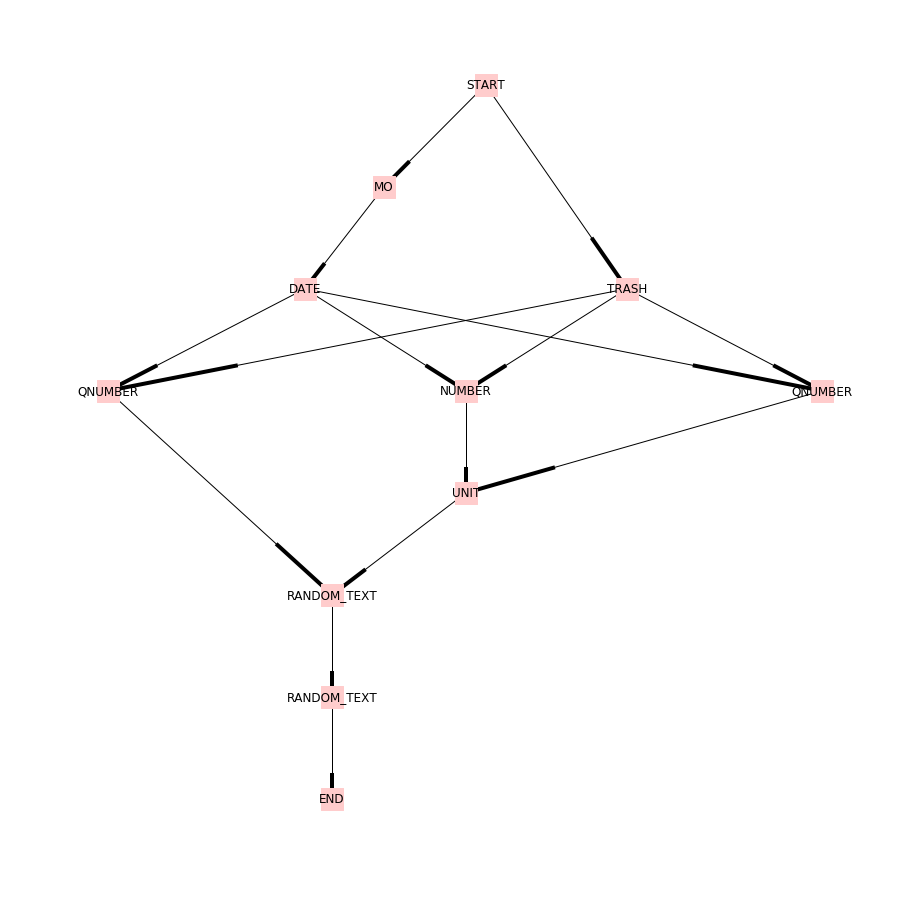

In [21]:
from estnltk.layer_operations.consecutive import iterate_consecutive_spans
from estnltk.finite_grammar.trees import START_SPAN, END_SPAN, Node, parse_graph, plot_graph, LayerGraph


def parse_text(text):
    graph = LayerGraph()
    spans = list(text.type) + list(text.random_text_layer) + [START_SPAN, END_SPAN]
    for a, b in iterate_consecutive_spans(spans):
        graph.add_edge( Node(support=a), Node(support=b))

    graph = parse_graph(graph, grammar, 4)
    return graph

text = tagged_lines[0]
print(text.text)
graph = parse_text(text)
plot_graph(graph)

In [22]:
t = 'PSA 03042012 - 0,83ng/ml perearsti poolt .'

In [23]:
t2 = 'PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va'

In [24]:
t3 = 'Kehakaal 80,2 kg , KMI 25,9'

In [25]:
text = Text(t)
test_regex_tagger.tag(text)
space_tagger.tag(text)
gaps_tagger.tag(text)
print(text.text)
graph = parse_text(text)
print_nodes(graph, text, 
        names={'DATE','UNIT','QNUMBER', 'MEASUREMENT', 'MO', 'NUMBER'},
        attributes=['name', 'text', 'value','unit_type', 'regex_type'])

PSA 03042012 - 0,83ng/ml perearsti poolt .
name                text                value               unit_type           regex_type          

DATE                03042012            date                                    date4               
MO                  PSA                 psa                                     measurement_object  
NUMBER              0,83                whatever                                number1             
QNUMBER             0,83                                                                            
QNUMBER             0,83ng/ml                                                                       
UNIT                ng/ml               psa_unit                                unit                


In [26]:
text = Text(t2)
test_regex_tagger.tag(text)
space_tagger.tag(text)
gaps_tagger.tag(text)
print(text.text)
graph = parse_text(text)
print_nodes(graph, text, 
        names={'DATE','UNIT','QNUMBER', 'MEASUREMENT', 'MO', 'NUMBER'},
        attributes=['name', 'text', 'value','unit_type', 'regex_type'])

PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va
name                text                value               unit_type           regex_type          

DATE                2010                partial_date                            date9               
DATE                2012                partial_date                            date9               
MO                   PSA                psa                                     measurement_object  
MO                  PSA                 psa                                     measurement_object  
NUMBER              53                  whatever                                number1             
QNUMBER             53                                                                              
QNUMBER             53ng/ml                                                                         
UNIT                ng/ml               psa_unit                                unit                
UNIT                ng/ml               ps

In [27]:
text = Text(t3)
test_regex_tagger.tag(text)
space_tagger.tag(text)
gaps_tagger.tag(text)
print(text.text)
graph = parse_text(text)
print_nodes(graph, text, 
        names={'DATE','UNIT','QNUMBER', 'MEASUREMENT', 'MO', 'NUMBER'},
        attributes=['name', 'text', 'value','unit_type', 'regex_type'])

Kehakaal 80,2 kg , KMI 25,9
name                text                value               unit_type           regex_type          

MO                  Kehakaal            kaal                                    measurement_object  
NUMBER              25,9                whatever                                number1             
NUMBER              80,2                whatever                                number1             
QNUMBER             25,9                                                                            
QNUMBER             80,2                                                                            
QNUMBER             80,2 kg                                                                         
UNIT                kg                  kaal_unit                               unit                


In [28]:
for line in tagged_lines:
    text = line
    print(text.text)
    graph = parse_text(text)
    print_nodes(graph, text, 
            names={'DATE','UNIT','QNUMBER', 'MEASUREMENT', 'MO', 'NUMBER'},
            attributes=['name', 'text', 'value','type', 'start', 'unit_type'])
    print('------------------------')

PSA 03042012 - 0,83ng/ml perearsti poolt .
name                text                value               type                start               unit_type           

DATE                03042012            date                                    4                                       
MO                  PSA                 psa                                     0                                       
NUMBER              0,83                whatever                                15                                      
QNUMBER             0,83                                                        15                                      
QNUMBER             0,83ng/ml                                                   15                                      
UNIT                ng/ml               psa_unit                                19                                      
------------------------
PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va
name                text            

In [29]:
import re

In [30]:
re.match('([0-9])+(\s?[,.]\s?[0-9]+)?', '1,53')

<_sre.SRE_Match object; span=(0, 4), match='1,53'>

In [31]:

print(text)
print_nodes(graph, text)

Text(text="rjeldus : Siinusbradükardia Fr 587min")
name                text                

END                                     
MO                  Fr                  
MO                  ük                  
NUMBER              587                 
QNUMBER             587                 
QNUMBER             587min              
RANDOM_TEXT         Siinusbrad          
RANDOM_TEXT         ardi                
RANDOM_TEXT         rjeldus             
START                                   
UNIT                a                   
UNIT                min                 


In [32]:
print_nodes(graph, text, 
            names={'DATE','UNIT','QNUMBER', 'MEASUREMENT'},
            attributes=['name', 'text', 'value','type', 'start'])

name                text                value               type                start               

QNUMBER             587                                                         31                  
QNUMBER             587min                                                      31                  
UNIT                a                   time_unit                               26                  
UNIT                min                 time_unit                               34                  


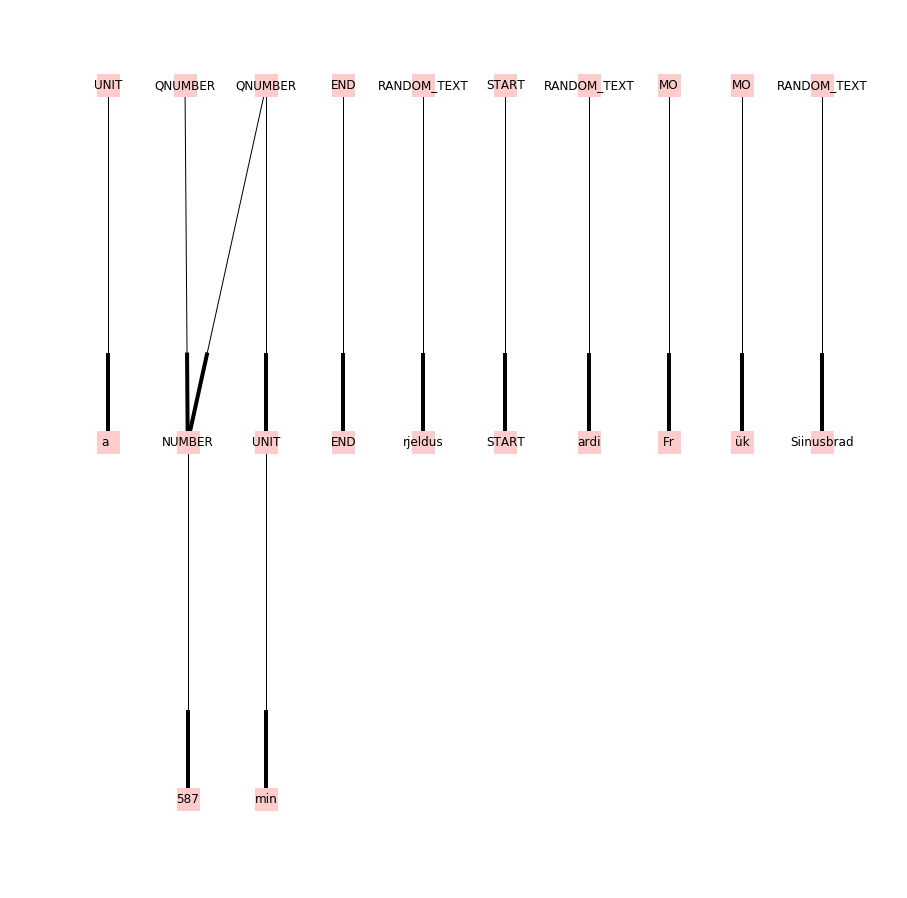

In [33]:
import networkx as nx

class SpanNode:
    """ Represents a text span as a node of a nx.DiGraph.
        Used to add parsed text spans to the graph.
    """
    def __init__(self, span):
        self.name = span.text
        self.start = span.start
        self.end = span.end

    def __hash__(self):
        return hash((self.name, self.start, self.end))


def graph_to_parse_trees(graph):
    parse_trees = nx.DiGraph()
    for node in graph.nodes():
        parse_trees.add_node(node)
        if isinstance(node.support, Span):
            sn = SpanNode(node.support) 
            parse_trees.add_edge(node, sn)
        else:
            for supp in node.support:
                parse_trees.add_edge(node, supp)
    return parse_trees

parse_trees = graph_to_parse_trees(graph)
plot_graph(parse_trees)

In [34]:
import ipywidgets as widgets


text_selection = widgets.Dropdown(
    options=lines,
    description='Text:',
)

def observe(change):
    out.clear_output()
    with out:
        line = change['new']
        graph = parse_text(lines_to_texts[line])
        print(lines_to_texts[line].text)
        plot_graph(graph)

text_selection.observe(observe, names='value')

out = widgets.Output()

display(text_selection, out)

Dropdown(description='Text:', options=('PSA 03042012 - 0,83ng/ml perearsti poolt .', 'PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va', 'PSA 20105,99 ja 26.01.2012 uuesti .', 'PSA 2011 oli 0 , 4 nG7ml .', 'PSA 201222,25ng/ml', 'PSA 2 aastajooksuldünaamikata , eriuuring', ':psa 16,81! ! ! ! ! ,', 'Happe-aluse tasakaal 6.0 ( 5.0 .. 8.0 )', 'loli 25 mgx1 ja Monoprili 10 mg Kolesterool 2011a', 'Kolesterool 1k aastas .', 'Kõrgenenud kolesterool 2a ( mõõdetud ). Ei pea dieetist kinni', 'Kontr Verekol 08.12a Per-le juurde .', 's vas munajuha kasvaja op , günekol 3a tagssi .', '08.11.2010 PSA 13.12.2011 7,2ng/ml PSADT on väike .', 'Rütmihäire tsüklipikkus 330 msek', 'Loote pikkus : \xa0 3 mm - vastab\xa0 5 nädalat 6 päeva.', 'Põhjendus: PALAT 10 # ALAT maksanäitaja', 'ärme vähk 2007 aastast cT3N0M0PSA 59ng/ml .', 'PSA 8,5( püsib aastaid selles väärtus', 'S , P-PSA 4.130( <4.100 µg/L )', 'PSA 5,2.', 'Kolesterool oli 7,9 mmol/l 0', 'kolesterool 6.4.', 'Kolesterool 5,2 mmol/l - esialgu dieet .', 'SK 3900 g , SP 51 cm .', 'Lapse kaal 5,4 kg/82 mg/0,82 ml i/m .', 'Kehakaal 80,2 kg , KMI 25,9', 'S , P-NT-proBNP 668 ( <125 pg/mL ) S , P-Albumiin 43 ( 35 .. 52 g/L ) S , P-ALAT 25 ( <33 U/L )', 'PSA 6,5 ng/ml, eesnäärme maht67cm3', 'rjeldus : Siinusbradükardia Fr 587min'), value='PSA 03042012 - 0,83ng/ml perearsti poolt .')

Output()

In [35]:
for node in graph:
    print(node)

Node(QNUMBER, (31, 34), 5493687929203814467)
Node(END, (inf, inf), -8159627462497770364)
Node(UNIT, (34, 37), -1457345086388203801)
Node(UNIT, (26, 28), 3297013399257940008)
Node(QNUMBER, (31, 37), 4723332727096344060)
Node(START, (-inf, -inf), 7713960978457535436)
Node(MO, (28, 30), 3637331910273131057)
Node(RANDOM_TEXT, (22, 26), 3491736201622393300)
Node(RANDOM_TEXT, (0, 7), 5234759250851349717)
Node(RANDOM_TEXT, (10, 20), 6554587586698497658)
Node(NUMBER, (31, 34), 2560861976827918940)
Node(MO, (20, 22), -6072949052538384706)
